#### Anggota Kelompok:
##### 1) Pandu Atisar Rahman (A11.2019.12312)
##### 2) Samsun Maarif       (A11.2019.12319)
##### 3) Pagas Pandhu Tanoyo (A11.2019.12340)

# 1) Mengumpulkan Data

In [ ]:
# Sumber data "des_final_dataset"

# 2) Menelaah Data

In [ ]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# Memuat dataset yang diperlukan

address = "des_final_dataset.csv"
df = pd.read_csv(address, header=0)

In [ ]:
# Menampilkan dataset yang telah dimuat

df

,NIM,Program Studi,Semester,IPK,Angkatan (Tahun Masuk),Pekerjaan Ayah,Pekerjaan Ibu,Penghasilan Kotor Ayah/perbulan,Penghasilan Kotor Ibu/perbulan,Jumlah Anggota Keluarga Yang ditanggung,Label
0,12019130002,S1 Matematika,3,3.85,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,3,T
1,1520182015,D3 Kebidanan,5,3.59,2018,Wiraswasta,Ibu Rumah Tangga,1000000,0,2,T
2,2020181004,D3 Keperawatan,5,2.98,2018,Wiraswasta,Ibu Rumah Tangga,1000000,1000000,1,Y
3,52019050043,S1 Farmasi,3,3.10,2019,Wiraswasta,Ibu Rumah Tangga,3000000,0,1,Y
4,F420185015,S1 Farmasi,5,3.06,2018,Tenaga Honorer,Ibu Rumah Tangga,1500000,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
772,2.12019E+11,D3 Keperawatan,3,3.35,2019,Petani,Guru,100000,100000,3,T
773,12019120003,S1 Pgsd,3,3.55,2019,Buruh Harian Lepas,Wiraswasta,0,1000000,1,T
774,1.12019E+11,S1 Keperawatan,3,2.60,2019,Guru,Karyawan Swasta,1000000,500000,5,T
775,1020183110,S1 Keperawatan,5,2.85,2018,Tidak Bekerja,PNS,0,3000000,3,T


In [ ]:
# Menampilkan ukuran dataset

df.shape

(777, 11)

In [ ]:
# Menampilkan tipe data tiap fitur

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   NIM                                      777 non-null    object 
 1   Program Studi                            777 non-null    object 
 2   Semester                                 777 non-null    int64  
 3   IPK                                      777 non-null    float64
 4   Angkatan (Tahun Masuk)                   777 non-null    int64  
 5   Pekerjaan Ayah                           777 non-null    object 
 6   Pekerjaan Ibu                            777 non-null    object 
 7   Penghasilan Kotor Ayah/perbulan          777 non-null    int64  
 8   Penghasilan Kotor Ibu/perbulan           777 non-null    int64  
 9   Jumlah Anggota Keluarga Yang ditanggung  777 non-null    int64  
 10  Label                                    777 non-n

In [ ]:
# Menampilkan distribusi Label

df['Label'].value_counts()

T    625
Y    152
Name: Label, dtype: int64

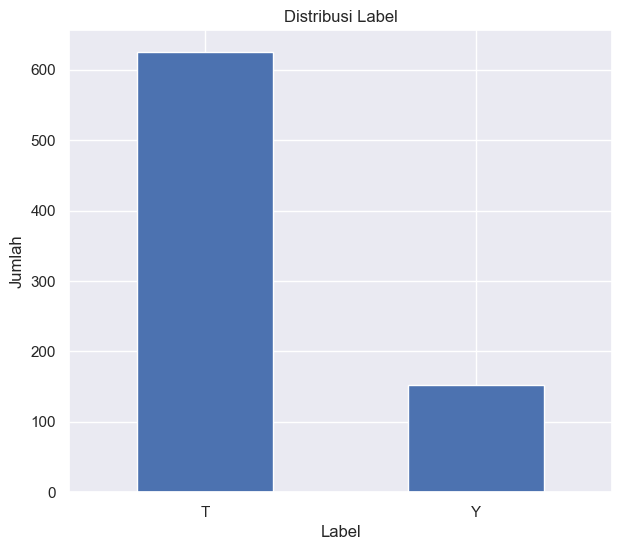

In [ ]:
# Menampilkan distribusi Label dengan grafik

sns.set()
df['Label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.title("Distribusi Label");

In [ ]:
# Menampilkan distribusi Program Studi dengan grafik

df['Program Studi'].value_counts()

S1 Keperawatan         454
D3 Keperawatan         146
S1 Farmasi              77
D3 Kebidanan            48
S1 Sistem Informasi     16
S1 Akuntansi             9
S1 Pgsd                  8
S1 Ilmu Komputer         5
S1 Ekonomi Syariah       5
S1 Hukum                 4
S1 Teknik Industri       3
S1 Matematika            2
Name: Program Studi, dtype: int64

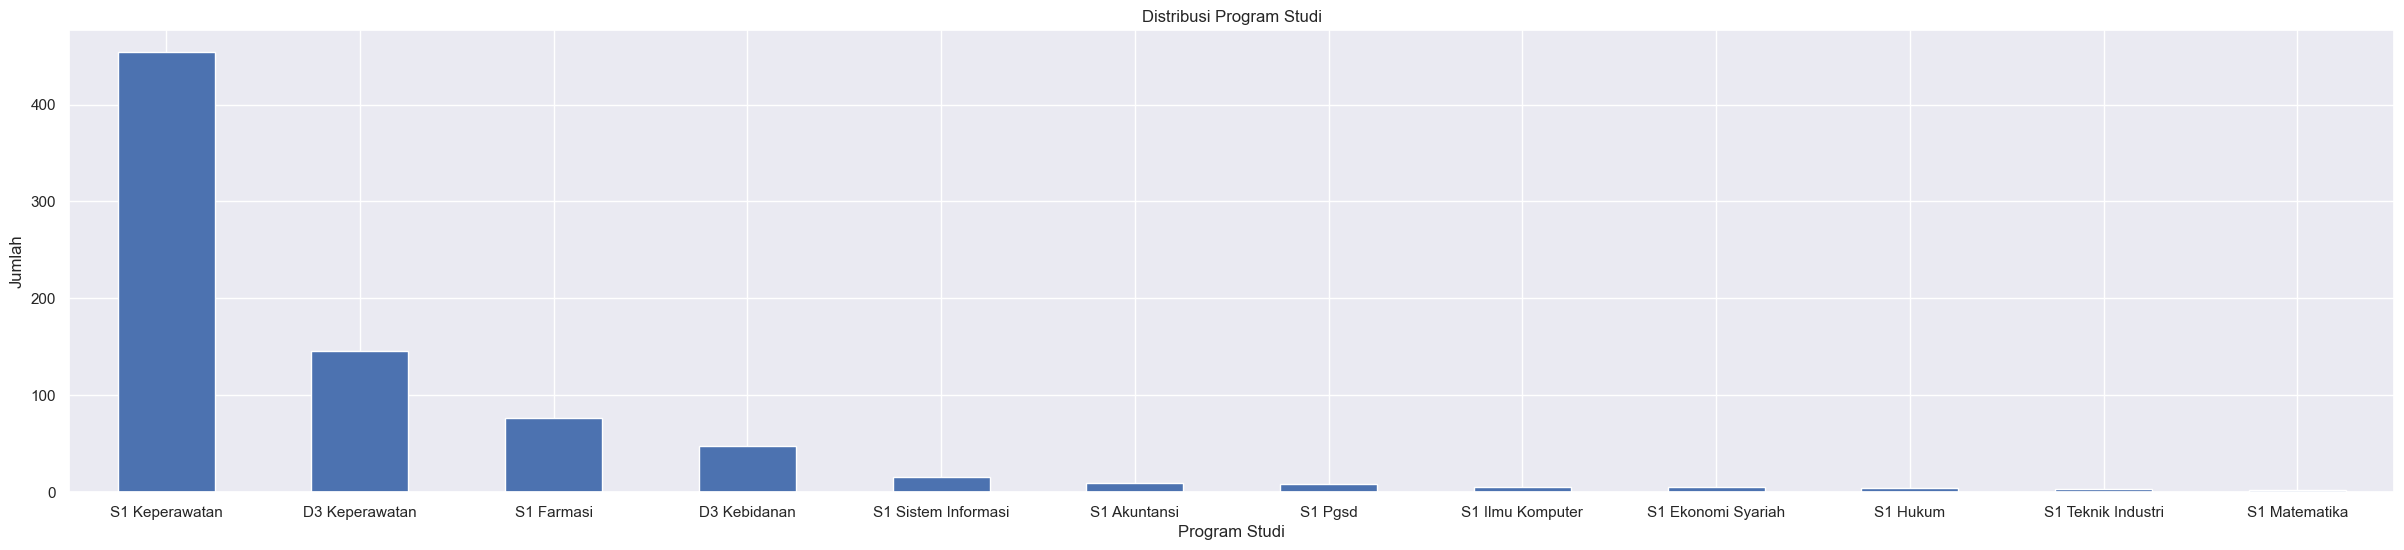

In [ ]:
# Menampilkan distribusi Program Studi dengan grafik

sns.set()
df['Program Studi'].value_counts().plot(kind='bar', figsize=(30, 6), rot=0)
plt.xlabel("Program Studi")
plt.ylabel("Jumlah")
plt.title("Distribusi Program Studi");

In [ ]:
# Menampilkan distribusi Semester dengan grafik

df['Semester'].value_counts()

3    377
5    278
7    122
Name: Semester, dtype: int64

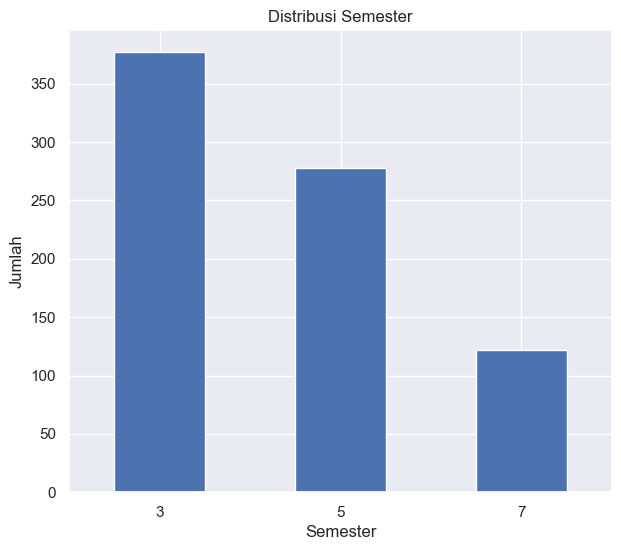

In [ ]:
# Menampilkan distribusi Semester dengan grafik

sns.set()
df['Semester'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Semester")
plt.ylabel("Jumlah")
plt.title("Distribusi Semester");

In [ ]:
# Menampilkan distribusi IPK dengan grafik

df['IPK'].value_counts()

3.00    61
3.10    53
3.25    51
2.90    39
3.05    36
        ..
3.65     1
3.80     1
3.57     1
3.71     1
2.25     1
Name: IPK, Length: 97, dtype: int64

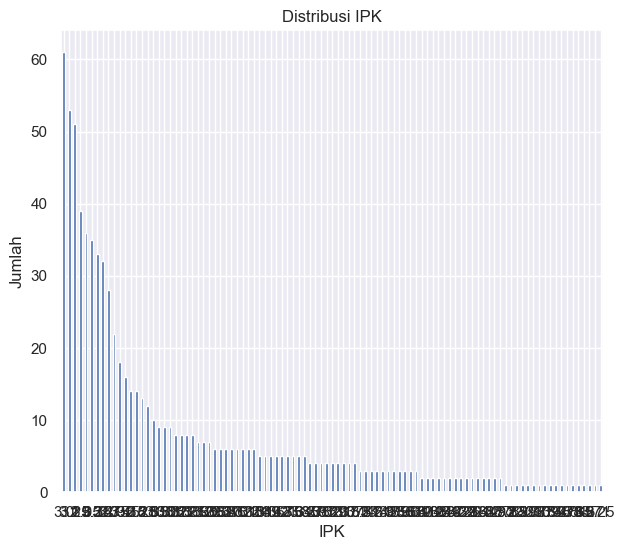

In [ ]:
# Menampilkan distribusi IPK dengan grafik

sns.set()
df['IPK'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("IPK")
plt.ylabel("Jumlah")
plt.title("Distribusi IPK");

In [ ]:
# Menampilkan distribusi Angkatan (Tahun Masuk) dengan grafik

df['Angkatan (Tahun Masuk)'].value_counts()

2019    378
2018    277
2017    121
2020      1
Name: Angkatan (Tahun Masuk), dtype: int64

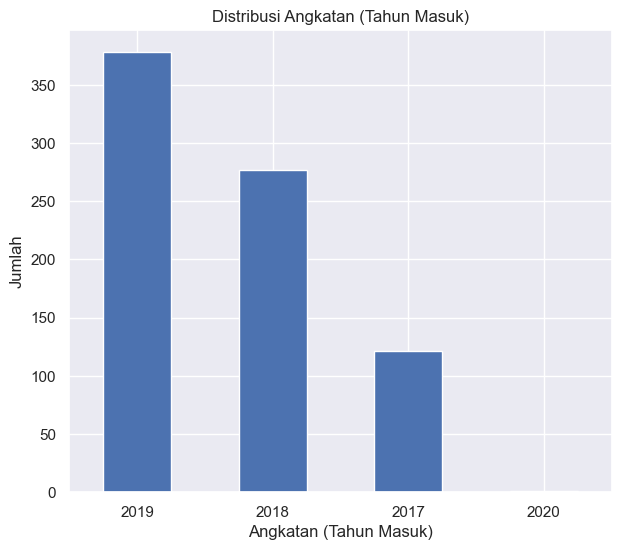

In [ ]:
# Menampilkan distribusi Angkatan (Tahun Masuk) dengan grafik

sns.set()
df['Angkatan (Tahun Masuk)'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Angkatan (Tahun Masuk)")
plt.ylabel("Jumlah")
plt.title("Distribusi Angkatan (Tahun Masuk)");

In [ ]:
# Menampilkan distribusi Pekerjaan Ayah dengan grafik

df['Pekerjaan Ayah'].value_counts()

Wiraswasta            279
Petani                140
Buruh Harian Lepas    108
Wafat                  58
PNS                    32
Karyawan Swasta        30
Pedagang               27
Guru                   24
Sopir                  23
Pensiunan              20
Nelayan                10
Tidak Bekerja           7
TNI-AD                  5
Perangkat Desa          4
Tenaga Honorer          3
Polri                   3
Wartawan                2
Satpam                  1
Perawat                 1
Name: Pekerjaan Ayah, dtype: int64

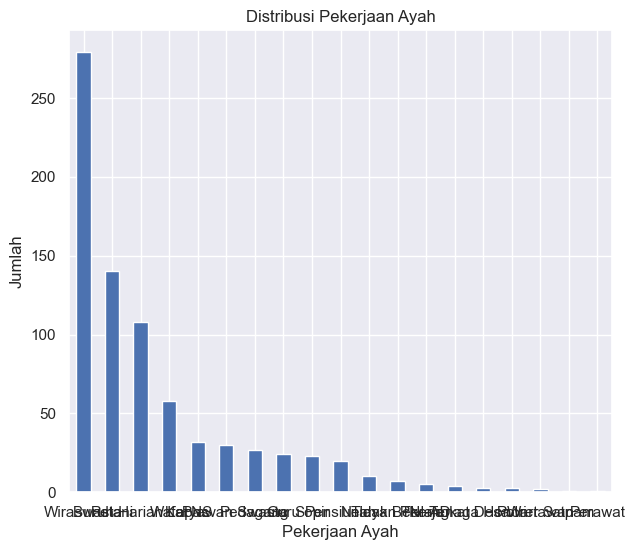

In [ ]:
# Menampilkan distribusi Pekerjaan Ayah dengan grafik

sns.set()
df['Pekerjaan Ayah'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Pekerjaan Ayah")
plt.ylabel("Jumlah")
plt.title("Distribusi Pekerjaan Ayah");

In [ ]:
# Menampilkan distribusi Pekerjaan Ibu dengan grafik

df['Pekerjaan Ibu'].value_counts()

Ibu Rumah Tangga    355
Wiraswasta          100
Pedagang             83
Petani               68
Buruh                47
Karyawan Swasta      36
PNS                  28
Guru                 27
Wafat                12
Tidak Bekerja        11
Perawat               4
TKW                   2
Pensiunan             2
Perangkat Desa        2
Name: Pekerjaan Ibu, dtype: int64

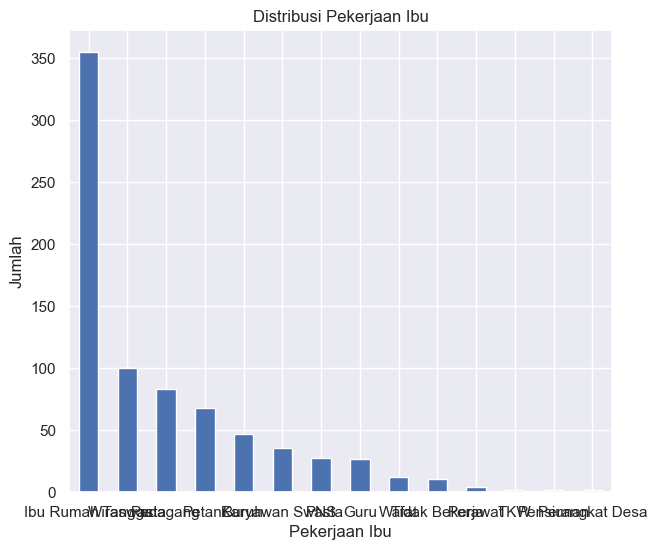

In [ ]:
# Menampilkan distribusi Pekerjaan Ibu dengan grafik

sns.set()
df['Pekerjaan Ibu'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Pekerjaan Ibu")
plt.ylabel("Jumlah")
plt.title("Distribusi Pekerjaan Ibu");

In [ ]:
# Menampilkan distribusi Penghasilan Kotor Ayah/perbulan dengan grafik

df['Penghasilan Kotor Ayah/perbulan'].value_counts()

1000000     166
2000000     138
1500000     113
3000000      75
0            68
500000       36
2500000      34
5000000      16
4000000      14
1800000      12
1200000      12
800000       10
900000        8
3500000       8
600000        8
1700000       5
2200000       4
100000        4
300000        4
2100000       4
2400000       3
2300000       3
700000        2
400000        2
3200000       2
4500000       2
2040000       1
2050000       1
3722000       1
10000000      1
3753100       1
2080000       1
2700000       1
750000        1
2800000       1
1680000       1
4416000       1
3591200       1
1350000       1
3524600       1
5600000       1
2850000       1
200000        1
450000        1
6000000       1
1300000       1
2250000       1
850000        1
1750000       1
1600000       1
Name: Penghasilan Kotor Ayah/perbulan, dtype: int64

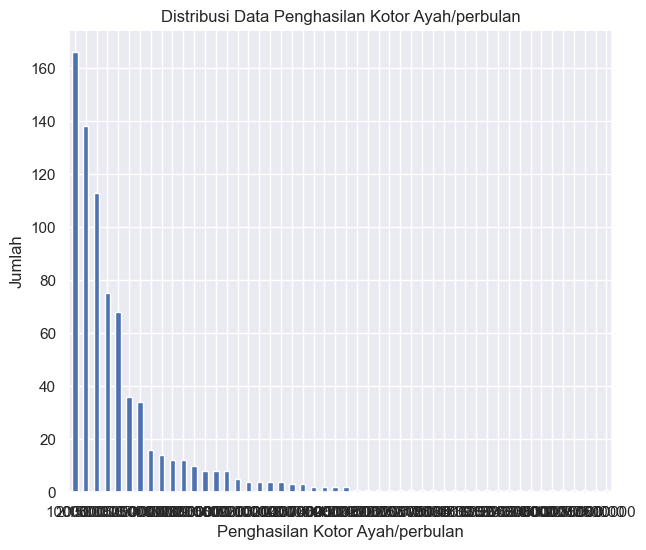

In [ ]:
# Menampilkan distribusi Penghasilan Kotor Ayah/perbulan dengan grafik

sns.set()
df['Penghasilan Kotor Ayah/perbulan'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Penghasilan Kotor Ayah/perbulan")
plt.ylabel("Jumlah")
plt.title("Distribusi Data Penghasilan Kotor Ayah/perbulan");

In [ ]:
# Menampilkan distribusi Penghasilan Kotor Ibu/perbulan dengan grafik

df['Penghasilan Kotor Ibu/perbulan'].value_counts()

0           352
1000000     136
500000       50
1500000      42
2000000      27
3000000      25
2500000      16
300000       14
800000       12
600000       11
1200000      10
200000        8
400000        7
700000        7
4000000       6
750000        5
250000        5
5000000       4
900000        4
1600000       3
1700000       3
6000000       3
2700000       3
1800000       3
1100000       2
100000        2
2400000       1
350000        1
2040000       1
3400000       1
10000000      1
4500000       1
2200000       1
850000        1
1400000       1
4108000       1
2190000       1
950000        1
1300000       1
1900000       1
2800000       1
4600000       1
4900000       1
Name: Penghasilan Kotor Ibu/perbulan, dtype: int64

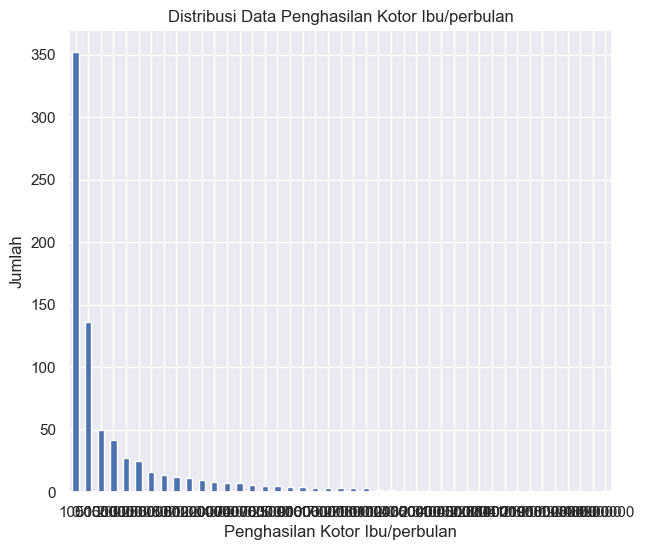

In [ ]:
# Menampilkan distribusi Penghasilan Kotor Ibu/perbulan dengan grafik

sns.set()
df['Penghasilan Kotor Ibu/perbulan'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Penghasilan Kotor Ibu/perbulan")
plt.ylabel("Jumlah")
plt.title("Distribusi Data Penghasilan Kotor Ibu/perbulan");

In [ ]:
# Menampilkan distribusi Jumlah Anggota Keluarga Yang ditanggung dengan grafik

df['Jumlah Anggota Keluarga Yang ditanggung'].value_counts()

2    308
1    251
3    133
4     42
0     26
5     10
7      3
6      2
8      2
Name: Jumlah Anggota Keluarga Yang ditanggung, dtype: int64

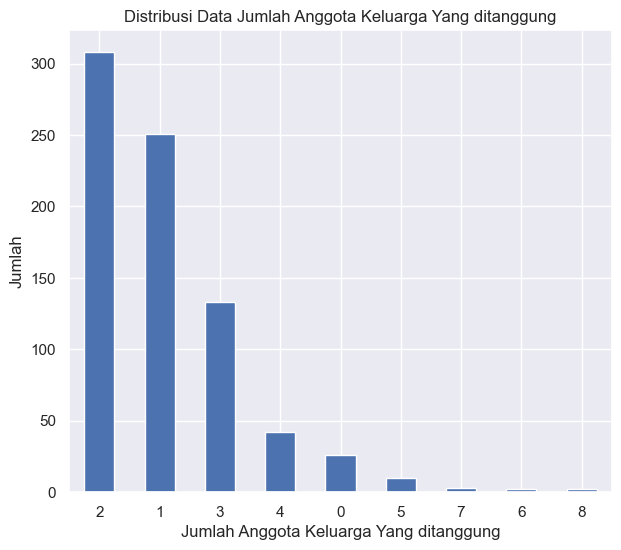

In [ ]:
# Menampilkan distribusi Jumlah Anggota Keluarga Yang ditanggung dengan grafik

sns.set()
df['Jumlah Anggota Keluarga Yang ditanggung'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Jumlah Anggota Keluarga Yang ditanggung")
plt.ylabel("Jumlah")
plt.title("Distribusi Data Jumlah Anggota Keluarga Yang ditanggung");

In [ ]:
# Merubah nama fitur untuk mempermudah pemrosesan

df.columns = [
    "nim",
    "x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9",
    "Label" 
]

# 3) Memvalidasi Data

In [ ]:
# Mengecek data NA pada tiap fitur

df.isna().values.any()

False

In [ ]:
# Mengecek data kosong pada tiap fitur

df.isnull().values.any()

False

# 4) Menentukan Objek Data

# 5) Membersihkan Data

In [ ]:
# Cek ukuran dataset terkini

df.shape

(777, 11)

In [ ]:
# Menghapus data duplikat pada dataset

df = df.drop_duplicates()

In [ ]:
# Cek ukuran dataset setelah menghapus data duplikat

df.shape

(709, 11)

In [ ]:
# Menghapus fitur konstan pada dataset

df = df.loc[:, df.apply(pd.Series.nunique) !=1]

In [ ]:
# Cek ukuran dataset setelah menghapus fitur konstan

df.shape

(709, 11)

In [ ]:
# Menangani data outliers dengan metode IQR (Interquartile Range)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


# 6) Mengkonstruksi Data

In [ ]:
# Mentransformasi data pada fitur non-numerik menjadi data numerik
# Transformasi menggunakan Label Encoder

le = LabelEncoder()

a1 = le.fit_transform(df['x1'])
a5 = le.fit_transform(df['x5'])
a6 = le.fit_transform(df['x6'])
Kelas = le.fit_transform(df['Label'])

In [ ]:
# Menghapus fitur sebelum di-encode dan menggantinya dengan fitur yang sudah di-encode

df.drop("x1", axis=1, inplace=True)
df["x1"] = a1

df.drop("x5", axis=1, inplace=True)
df["x5"] = a5

df.drop("x6", axis=1, inplace=True)
df["x6"] = a6

df.drop("Label", axis=1, inplace=True)
df["Label"] = Kelas

Text(0.5, 1.0, 'Correlation Matrix')

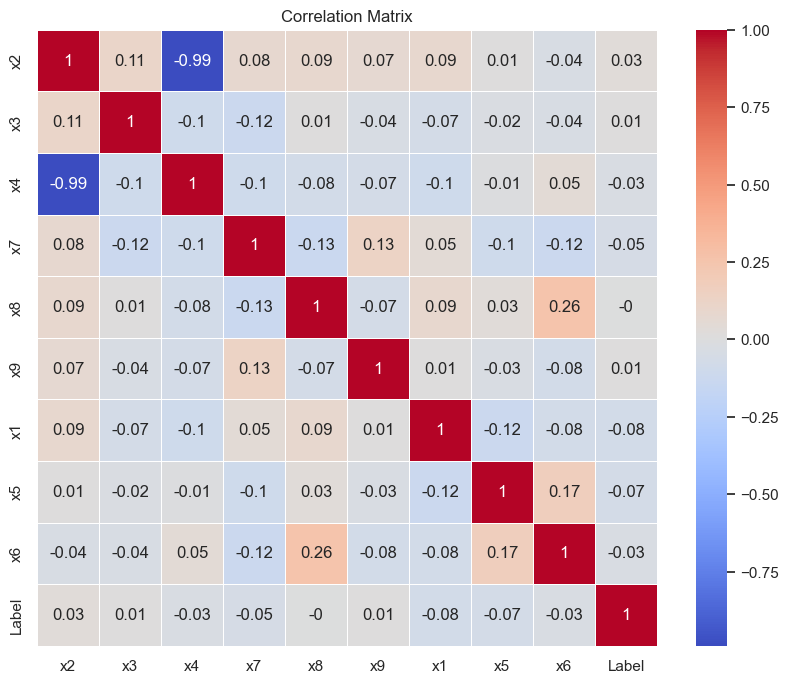

In [ ]:
# Mengetahui Correlation Matrix antar fitur

plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix")

In [ ]:
# Menghapus fitur yang kurang penting
# Menghapus fitur dengan korelasi rendah berdasarkan Correlation Matrix

df.drop(['nim', 'x4'], axis = 1, inplace = True)

In [ ]:
# Menampilkan dataset terkini

df.head()

,x2,x3,x7,x8,x9,x1,x5,x6,Label
1,5,3.59,1000000,0,2,0,16,2,0
2,5,2.98,1000000,1000000,1,1,16,2,1
3,3,3.10,3000000,0,1,4,16,2,1
4,5,3.06,1500000,0,1,4,13,2,1
5,5,2.78,1500000,1500000,1,7,16,10,1


In [ ]:
# Cek kembali tipe data tiap fitur

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 776
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x2      592 non-null    int64  
 1   x3      592 non-null    float64
 2   x7      592 non-null    int64  
 3   x8      592 non-null    int64  
 4   x9      592 non-null    int64  
 5   x1      592 non-null    int32  
 6   x5      592 non-null    int32  
 7   x6      592 non-null    int32  
 8   Label   592 non-null    int32  
dtypes: float64(1), int32(4), int64(4)
memory usage: 37.0 KB


In [ ]:
# Merubah tipe data tiap fitur agar seragam

df['x1'] = df['x1'].astype("float64")
df['x2'] = df['x2'].astype("float64")
df['x3'] = df['x3'].astype("float64")
df['x5'] = df['x5'].astype("float64")
df['x6'] = df['x6'].astype("float64")
df['x7'] = df['x7'].astype("float64")
df['x8'] = df['x8'].astype("float64")
df['x9'] = df['x9'].astype("float64")
df['Label'] = df['Label'].astype("int64")

In [ ]:
# Cek tipe data tiap fitur setelah dirubah tipe datanya

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 1 to 776
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x2      592 non-null    float64
 1   x3      592 non-null    float64
 2   x7      592 non-null    float64
 3   x8      592 non-null    float64
 4   x9      592 non-null    float64
 5   x1      592 non-null    float64
 6   x5      592 non-null    float64
 7   x6      592 non-null    float64
 8   Label   592 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 46.2 KB


In [ ]:
# Menampilkan deskripsi semua data pada dataset bersih

df.describe()

,x2,x3,x7,x8,x9,x1,x5,x6,Label
count,592.000000,592.000000,5.920000e+02,5.920000e+02,592.000000,592.000000,592.000000,592.000000,592.000000
mean,4.408784,3.168801,1.461233e+06,5.657770e+05,1.717905,5.016892,9.506757,4.530405,0.217905
std,1.479170,0.223144,8.297638e+05,6.607311e+05,0.784678,2.806757,6.207082,4.128530,0.413172
min,3.000000,2.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,1.000000e+06,0.000000e+00,1.000000,1.000000,4.000000,2.000000,0.000000
50%,5.000000,3.160000,1.500000e+06,3.000000e+05,2.000000,7.000000,8.000000,2.000000,0.000000
75%,5.000000,3.330000,2.000000e+06,1.000000e+06,2.000000,7.000000,16.000000,6.000000,0.000000
max,7.000000,3.830000,3.500000e+06,2.500000e+06,3.000000,10.000000,16.000000,13.000000,1.000000


In [ ]:
# Mengecek imbalance pada Label
# Menampilkan jumlah value pada Label

df["Label"].value_counts()

0    463
1    129
Name: Label, dtype: int64

In [ ]:
# Cek ukuran dataset sebelum dilakukan penanganan imbalance data pada Label

df.shape

(592, 9)

In [ ]:
# Splitting data fitur untuk persiapan oversampling

X_samp = df.drop(['Label'], 1)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Splitting data label untuk persiapan oversampling

y_samp = df['Label']

In [ ]:
# Proses oversampling dengan SMOTE dengan tambahan Tomek Links

smote = SMOTETomek(random_state=42)
X, y = smote.fit_resample(X_samp, y_samp)

In [ ]:
# Cek ukuran fitur dataset setelah dilakukan penanganan imbalance data pada Label

X.shape

(822, 8)

In [ ]:
# Cek ukuran label dataset setelah dilakukan penanganan imbalance data pada Label

y.shape

(822,)

## Splitting Data Asli

In [ ]:
# Splitting data asli dengan perbandingan training:testing adalah 8:2

X_train_82, X_test_82, Y_train_82, Y_test_82 = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting data asli dengan perbandingan training:testing adalah 7:3

X_train_73, X_test_73, Y_train_73, Y_test_73 = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Splitting data asli dengan perbandingan training:testing adalah 9:1

X_train_91, X_test_91, Y_train_91, Y_test_91 = train_test_split(X, y, test_size=0.1, random_state=42)

## Splitting Data Normalisasi

In [ ]:
# Proses fitting fitur menggunakan Standard Scaler untuk memperoleh data normalisasi

X_norm = StandardScaler().fit_transform(X)

In [ ]:
# Splitting data normalisasi dengan perbandingan training:testing adalah 8:2

X_train_norm_82, X_test_norm_82, Y_train_norm_82, Y_test_norm_82 = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting data normalisasi dengan perbandingan training:testing adalah 7:3

X_train_norm_73, X_test_norm_73, Y_train_norm_73, Y_test_norm_73 = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [ ]:
# Splitting data normalisasi dengan perbandingan training:testing adalah 9:1

X_train_norm_91, X_test_norm_91, Y_train_norm_91, Y_test_norm_91 = train_test_split(X_norm, y, test_size=0.1, random_state=42)

# 7) Menentukan Label Data

# 8) Membangun Skenario Model

## Decision Tree

In [ ]:
# Membangun skenario parameter/tuning dari Decision Tree yang akan digunakan

dt_parameters = {
                "max_depth": np.arange(1,20),
                "min_samples_leaf": np.arange(1,50),
                "min_samples_split": np.arange(2,10),
                "criterion": ['gini','entropy'],
                "random_state": [42]
}

In [ ]:
# Membangun model Decision Tree

dt_model = DecisionTreeClassifier()

# 9) Membangun Model

## Modelling Data Asli

### Data Asli Train:Test 8:2

In [ ]:
# Membangun model data asli 8:2 dengan menggunakan Grid Search CV

model_data_asli_82 = GridSearchCV(dt_model, dt_parameters, cv=5, n_jobs=-1)

In [ ]:
model_data_asli_82.fit(X_train_82, Y_train_82)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [42]})

In [ ]:
# Mencari tahu nilai parameter terbaik dari parameter-parameter yang di-tune

for param_name in sorted(dt_parameters.keys()):
    print('%s: %r' %(param_name, model_data_asli_82.best_params_[param_name]))

criterion: 'entropy'
max_depth: 10
min_samples_leaf: 5
min_samples_split: 2
random_state: 42


### Data Asli Train:Test 7:3

In [ ]:
# Membangun model data asli 7:3 dengan menggunakan Grid Search CV

model_data_asli_73 = GridSearchCV(dt_model, dt_parameters, cv=5, n_jobs=-1)

In [ ]:
model_data_asli_73.fit(X_train_73, Y_train_73)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [42]})

In [ ]:
# Mencari tahu nilai parameter terbaik dari parameter-parameter yang di-tune

for param_name in sorted(dt_parameters.keys()):
    print('%s: %r' %(param_name, model_data_asli_73.best_params_[param_name]))

criterion: 'entropy'
max_depth: 8
min_samples_leaf: 5
min_samples_split: 2
random_state: 42


### Data Asli Train:Test 9:1

In [ ]:
# Membangun model data asli 9:1 dengan menggunakan Grid Search CV

model_data_asli_91 = GridSearchCV(dt_model, dt_parameters, cv=5, n_jobs=-1)

In [ ]:
model_data_asli_91.fit(X_train_91, Y_train_91)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [42]})

In [ ]:
# Mencari tahu nilai parameter terbaik dari parameter-parameter yang di-tune

for param_name in sorted(dt_parameters.keys()):
    print('%s: %r' %(param_name, model_data_asli_91.best_params_[param_name]))

criterion: 'entropy'
max_depth: 11
min_samples_leaf: 2
min_samples_split: 2
random_state: 42


## Modelling Data Normalisasi

### Data Normalisasi Train:Test 8:2

In [ ]:
# Membangun model data normalisasi 8:2 dengan menggunakan Grid Search CV

model_data_norm_82 = GridSearchCV(dt_model, dt_parameters, cv=5, n_jobs=-1)

In [ ]:
model_data_norm_82.fit(X_train_norm_82, Y_train_norm_82)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [42]})

In [ ]:
# Mencari tahu nilai parameter terbaik dari parameter-parameter yang di-tune

for param_name in sorted(dt_parameters.keys()):
    print('%s: %r' %(param_name, model_data_norm_82.best_params_[param_name]))

criterion: 'entropy'
max_depth: 10
min_samples_leaf: 5
min_samples_split: 2
random_state: 42


### Data Normalisasi Train:Test 7:3

In [ ]:
# Membangun model data normalisasi 7:3 dengan menggunakan Grid Search CV

model_data_norm_73 = GridSearchCV(dt_model, dt_parameters, cv=5, n_jobs=-1)

In [ ]:
model_data_norm_73.fit(X_train_norm_73, Y_train_norm_73)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [42]})

In [ ]:
# Mencari tahu nilai parameter terbaik dari parameter-parameter yang di-tune

for param_name in sorted(dt_parameters.keys()):
    print('%s: %r' %(param_name, model_data_norm_73.best_params_[param_name]))

criterion: 'entropy'
max_depth: 8
min_samples_leaf: 5
min_samples_split: 2
random_state: 42


### Data Normalisasi Train:Test 9:1

In [ ]:
# Membangun model data normalisasi 9:1 dengan menggunakan Grid Search CV

model_data_norm_91 = GridSearchCV(dt_model, dt_parameters, cv=5, n_jobs=-1)

In [ ]:
model_data_norm_91.fit(X_train_norm_91, Y_train_norm_91)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'random_state': [42]})

In [ ]:
# Mencari tahu nilai parameter terbaik dari parameter-parameter yang di-tune

for param_name in sorted(dt_parameters.keys()):
    print('%s: %r' %(param_name, model_data_norm_91.best_params_[param_name]))

criterion: 'entropy'
max_depth: 11
min_samples_leaf: 2
min_samples_split: 2
random_state: 42


# 10) Mengevaluasi Hasil Pemodelan

## Evaluasi Data Asli

### Evaluasi Data Asli 8:2

In [ ]:
# Evaluasi data training pada data asli

pred_train_asli_82 = model_data_asli_82.predict(X_train_82)

acc_train_asli_82 = accuracy_score(Y_train_82, pred_train_asli_82)
print('Accuracy of Data Training: ', acc_train_asli_82)

pre_train_asli_82 = precision_score(Y_train_82, pred_train_asli_82, average='micro')
print('Precision of Data Training: ', pre_train_asli_82)

rec_train_asli_82 = recall_score(Y_train_82, pred_train_asli_82, average='micro')
print('Recall of Data Training: ', rec_train_asli_82)


# Evaluasi data testing pada data asli

pred_test_asli_82 = model_data_asli_82.predict(X_test_82)

acc_test_asli_82 = accuracy_score(Y_test_82, pred_test_asli_82)
print('Accuracy of Data Testing: ', acc_test_asli_82)

pre_test_asli_82 = precision_score(Y_test_82, pred_test_asli_82, average='micro')
print('Precision of Data Testing: ', pre_test_asli_82)

rec_test_asli_82 = recall_score(Y_test_82, pred_test_asli_82, average='micro')
print('Recall of Data Testing: ', rec_test_asli_82)

Accuracy of Data Training:  0.928462709284627
Precision of Data Training:  0.928462709284627
Recall of Data Training:  0.928462709284627
Accuracy of Data Testing:  0.8606060606060606
Precision of Data Testing:  0.8606060606060606
Recall of Data Testing:  0.8606060606060606


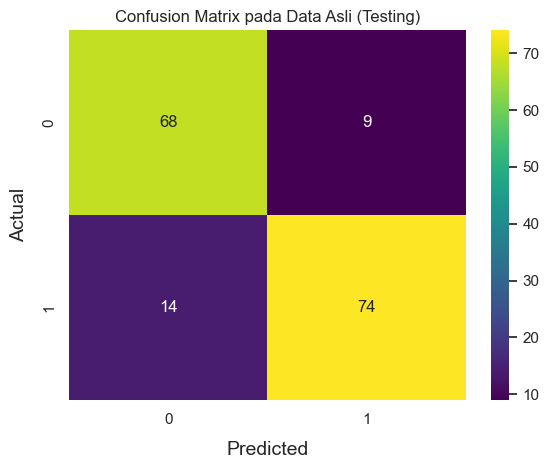

In [ ]:
# Confusion matrix data asli (testing)

sns.heatmap(confusion_matrix(Y_test_82, pred_test_asli_82),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada Data Asli (Testing)')
plt.show()

### Evaluasi Data Asli 7:3

In [ ]:
# Evaluasi data training pada data asli

pred_train_asli_73 = model_data_asli_73.predict(X_train_73)

acc_train_asli_73 = accuracy_score(Y_train_73, pred_train_asli_73)
print('Accuracy of Data Training: ', acc_train_asli_73)

pre_train_asli_73 = precision_score(Y_train_73, pred_train_asli_73, average='micro')
print('Precision of Data Training: ', pre_train_asli_73)

rec_train_asli_73 = recall_score(Y_train_73, pred_train_asli_73, average='micro')
print('Recall of Data Training: ', rec_train_asli_73)


# Evaluasi data testing pada data asli

pred_test_asli_73 = model_data_asli_73.predict(X_test_73)

acc_test_asli_73 = accuracy_score(Y_test_73, pred_test_asli_73)
print('Accuracy of Data Testing: ', acc_test_asli_73)

pre_test_asli_73 = precision_score(Y_test_73, pred_test_asli_73, average='micro')
print('Precision of Data Testing: ', pre_test_asli_73)

rec_test_asli_73 = recall_score(Y_test_73, pred_test_asli_73, average='micro')
print('Recall of Data Testing: ', rec_test_asli_73)

Accuracy of Data Training:  0.9147826086956522
Precision of Data Training:  0.9147826086956522
Recall of Data Training:  0.9147826086956522
Accuracy of Data Testing:  0.8421052631578947
Precision of Data Testing:  0.8421052631578947
Recall of Data Testing:  0.8421052631578947


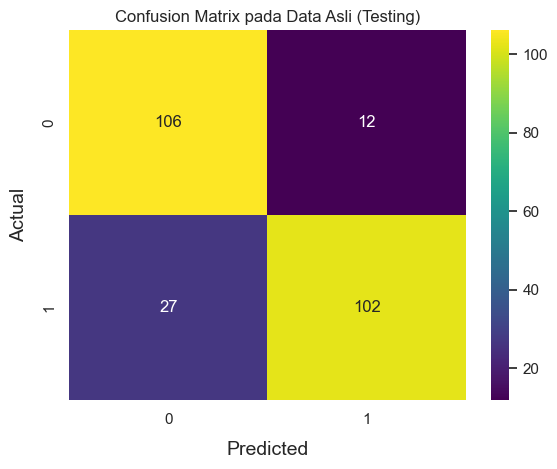

In [ ]:
# Confusion matrix data asli (testing)

sns.heatmap(confusion_matrix(Y_test_73, pred_test_asli_73),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada Data Asli (Testing)')
plt.show()

### Evaluasi Data Asli 9:1

In [ ]:
# Evaluasi data training pada data asli

pred_train_asli_91 = model_data_asli_91.predict(X_train_91)

acc_train_asli_91 = accuracy_score(Y_train_91, pred_train_asli_91)
print('Accuracy of Data Training: ', acc_train_asli_91)

pre_train_asli_91 = precision_score(Y_train_91, pred_train_asli_91, average='micro')
print('Precision of Data Training: ', pre_train_asli_91)

rec_train_asli_91 = recall_score(Y_train_91, pred_train_asli_91, average='micro')
print('Recall of Data Training: ', rec_train_asli_91)


# Evaluasi data testing pada data asli

pred_test_asli_91 = model_data_asli_91.predict(X_test_91)

acc_test_asli_91 = accuracy_score(Y_test_91, pred_test_asli_91)
print('Accuracy of Data Testing: ', acc_test_asli_91)

pre_test_asli_91 = precision_score(Y_test_91, pred_test_asli_91, average='micro')
print('Precision of Data Testing: ', pre_test_asli_91)

rec_test_asli_91 = recall_score(Y_test_91, pred_test_asli_91, average='micro')
print('Recall of Data Testing: ', rec_test_asli_91)

Accuracy of Data Training:  0.9472259810554804
Precision of Data Training:  0.9472259810554804
Recall of Data Training:  0.9472259810554804
Accuracy of Data Testing:  0.8072289156626506
Precision of Data Testing:  0.8072289156626506
Recall of Data Testing:  0.8072289156626506


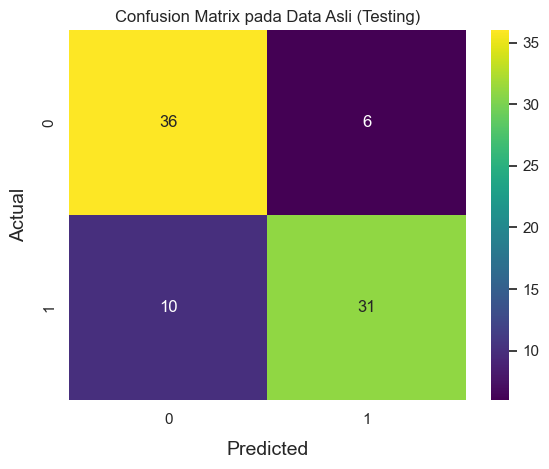

In [ ]:
# Confusion matrix data asli (testing)

sns.heatmap(confusion_matrix(Y_test_91, pred_test_asli_91),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada Data Asli (Testing)')
plt.show()

## Evaluasi Data Normal

### Evaluasi Data Normal 8:2

In [ ]:
# Evaluasi data training pada data normalisasi

pred_train_norm_82 = model_data_norm_82.predict(X_train_norm_82)

acc_train_norm_82 = accuracy_score(Y_train_norm_82, pred_train_norm_82)
print('Accuracy of Data Training: ', acc_train_norm_82)

pre_train_norm_82 = precision_score(Y_train_norm_82, pred_train_norm_82, average='micro')
print('Precision of Data Training: ', pre_train_norm_82)

rec_train_norm_82 = recall_score(Y_train_norm_82, pred_train_norm_82, average='micro')
print('Recall of Data Training: ', rec_train_norm_82)


# Evaluasi data testing pada data normalisasi

pred_test_norm_82 = model_data_norm_82.predict(X_test_norm_82)

acc_test_norm_82 = accuracy_score(Y_test_norm_82, pred_test_norm_82)
print('Accuracy of Data Testing: ', acc_test_norm_82)

pre_test_norm_82 = precision_score(Y_test_norm_82, pred_test_norm_82, average='micro')
print('Precision of Data Testing: ', pre_test_norm_82)

rec_test_norm_82 = recall_score(Y_test_norm_82, pred_test_norm_82, average='micro')
print('Recall of Data Testing: ', rec_test_norm_82)

Accuracy of Data Training:  0.928462709284627
Precision of Data Training:  0.928462709284627
Recall of Data Training:  0.928462709284627
Accuracy of Data Testing:  0.8606060606060606
Precision of Data Testing:  0.8606060606060606
Recall of Data Testing:  0.8606060606060606


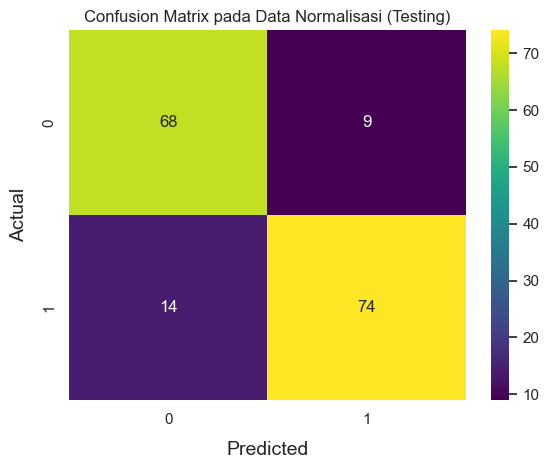

In [ ]:
# Confusion matrix data normalisasi (testing)

sns.heatmap(confusion_matrix(Y_test_norm_82, pred_test_norm_82),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada Data Normalisasi (Testing)')
plt.show()

### Evaluasi Data Normal 7:3

In [ ]:
# Evaluasi data training pada data normalisasi

pred_train_norm_73 = model_data_norm_73.predict(X_train_norm_73)

acc_train_norm_73 = accuracy_score(Y_train_norm_73, pred_train_norm_73)
print('Accuracy of Data Training: ', acc_train_norm_73)

pre_train_norm_73 = precision_score(Y_train_norm_73, pred_train_norm_73, average='micro')
print('Precision of Data Training: ', pre_train_norm_73)

rec_train_norm_73 = recall_score(Y_train_norm_73, pred_train_norm_73, average='micro')
print('Recall of Data Training: ', rec_train_norm_73)


# Evaluasi data testing pada data normalisasi

pred_test_norm_73 = model_data_norm_73.predict(X_test_norm_73)

acc_test_norm_73 = accuracy_score(Y_test_norm_73, pred_test_norm_73)
print('Accuracy of Data Testing: ', acc_test_norm_73)

pre_test_norm_73 = precision_score(Y_test_norm_73, pred_test_norm_73, average='micro')
print('Precision of Data Testing: ', pre_test_norm_73)

rec_test_norm_73 = recall_score(Y_test_norm_73, pred_test_norm_73, average='micro')
print('Recall of Data Testing: ', rec_test_norm_73)

Accuracy of Data Training:  0.9147826086956522
Precision of Data Training:  0.9147826086956522
Recall of Data Training:  0.9147826086956522
Accuracy of Data Testing:  0.8421052631578947
Precision of Data Testing:  0.8421052631578947
Recall of Data Testing:  0.8421052631578947


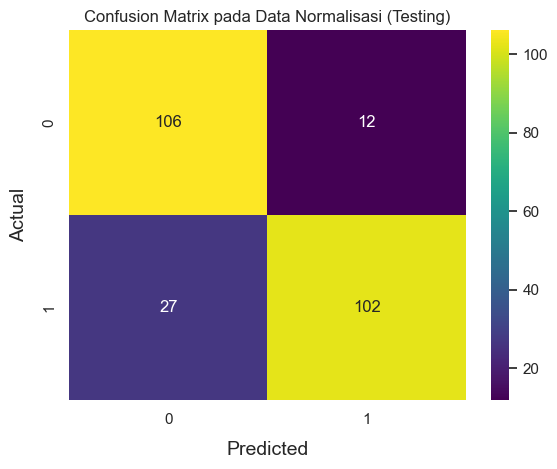

In [ ]:
# Confusion matrix data normalisasi (testing)

sns.heatmap(confusion_matrix(Y_test_norm_73, pred_test_norm_73),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada Data Normalisasi (Testing)')
plt.show()

### Evaluasi Data Normal 9:1

In [ ]:
# Evaluasi data training pada data normalisasi

pred_train_norm_91 = model_data_norm_91.predict(X_train_norm_91)

acc_train_norm_91 = accuracy_score(Y_train_norm_91, pred_train_norm_91)
print('Accuracy of Data Training: ', acc_train_norm_91)

pre_train_norm_91 = precision_score(Y_train_norm_91, pred_train_norm_91, average='micro')
print('Precision of Data Training: ', pre_train_norm_91)

rec_train_norm_91 = recall_score(Y_train_norm_91, pred_train_norm_91, average='micro')
print('Recall of Data Training: ', rec_train_norm_91)


# Evaluasi data testing pada data normalisasi

pred_test_norm_91 = model_data_norm_91.predict(X_test_norm_91)

acc_test_norm_91 = accuracy_score(Y_test_norm_91, pred_test_norm_91)
print('Accuracy of Data Testing: ', acc_test_norm_91)

pre_test_norm_91 = precision_score(Y_test_norm_91, pred_test_norm_91, average='micro')
print('Precision of Data Testing: ', pre_test_norm_91)

rec_test_norm_91 = recall_score(Y_test_norm_91, pred_test_norm_91, average='micro')
print('Recall of Data Testing: ', rec_test_norm_91)

Accuracy of Data Training:  0.9472259810554804
Precision of Data Training:  0.9472259810554804
Recall of Data Training:  0.9472259810554804
Accuracy of Data Testing:  0.8072289156626506
Precision of Data Testing:  0.8072289156626506
Recall of Data Testing:  0.8072289156626506


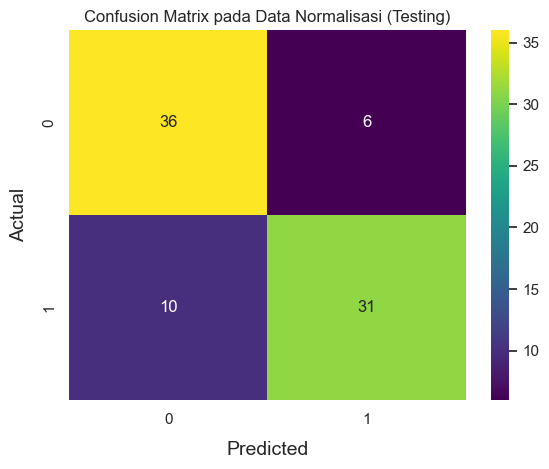

In [ ]:
# Confusion matrix data normalisasi (testing)

sns.heatmap(confusion_matrix(Y_test_norm_91, pred_test_norm_91),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada Data Normalisasi (Testing)')
plt.show()

# 11) Melakukan Proses Review Pemodelan

In [ ]:
# Parameter data untuk 'models_show'

# models = [
#     ('Decision Tree Data Asli 8:2', acc_train_asli_82, acc_test_asli_82),
#     ('Decision Tree Data Asli 7:3', acc_train_asli_73, acc_test_asli_73),
#     ('Decision Tree Data Asli 9:1', acc_train_asli_91, acc_test_asli_91),
#     ('Decision Tree Data Norm 8:2', acc_train_norm_82, acc_test_norm_82),
#     ('Decision Tree Data Norm 7:3', acc_train_norm_73, acc_test_norm_73),
#     ('Decision Tree Data Norm 9:1', acc_train_norm_91, acc_test_norm_91),
# ]

models = [
    ('Decision Tree Data Asli 8:2', acc_train_asli_82, acc_test_asli_82, pre_test_asli_82, rec_test_asli_82),
    ('Decision Tree Data Asli 7:3', acc_train_asli_73, acc_test_asli_73, pre_test_asli_73, rec_test_asli_73),
    ('Decision Tree Data Asli 9:1', acc_train_asli_91, acc_test_asli_91, pre_test_asli_91, rec_test_asli_91),
    ('Decision Tree Data Norm 8:2', acc_train_norm_82, acc_test_norm_82, pre_test_norm_82, rec_test_norm_82),
    ('Decision Tree Data Norm 7:3', acc_train_norm_73, acc_test_norm_73, pre_test_norm_73, rec_test_norm_73),
    ('Decision Tree Data Norm 9:1', acc_train_norm_91, acc_test_norm_91, pre_test_norm_91, rec_test_norm_91),
]

In [ ]:
# Menampilkan review training dan testing accuracy dari model yang telah dibuat

models_show = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall'])
models_show

,Model,Training Accuracy,Testing Accuracy,Precision,Recall
0,Decision Tree Data Asli 8:2,0.928463,0.860606,0.860606,0.860606
1,Decision Tree Data Asli 7:3,0.914783,0.842105,0.842105,0.842105
2,Decision Tree Data Asli 9:1,0.947226,0.807229,0.807229,0.807229
3,Decision Tree Data Norm 8:2,0.928463,0.860606,0.860606,0.860606
4,Decision Tree Data Norm 7:3,0.914783,0.842105,0.842105,0.842105
5,Decision Tree Data Norm 9:1,0.947226,0.807229,0.807229,0.807229


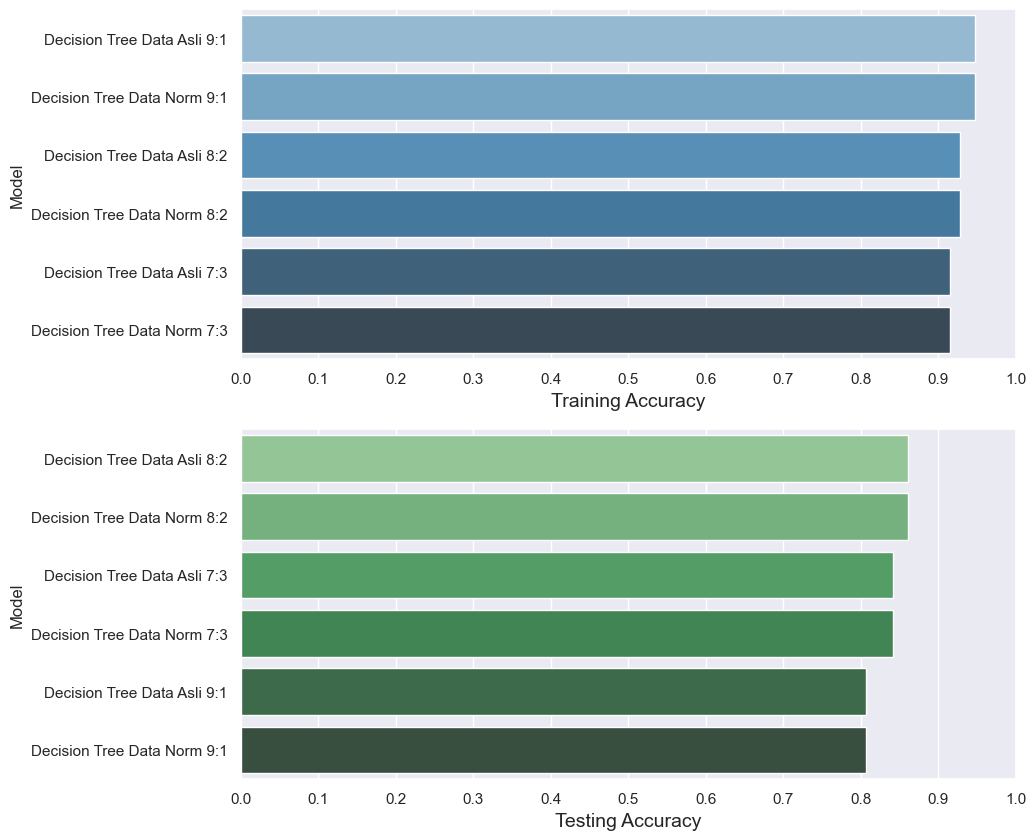

In [ ]:
# Menampilkan review training dan testing accuracy dalam bentuk diagram batang

f, axes = plt.subplots(2,1, figsize=(10,10))

models_show.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Training Accuracy', y='Model', data = models_show, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training Accuracy', size=14)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

models_show.sort_values(by=['Testing Accuracy'], ascending=False, inplace=True)
sns.barplot(x='Testing Accuracy', y='Model', data = models_show, palette='Greens_d', ax = axes[1])
axes[1].set_xlabel('Testing Accuracy', size=14)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

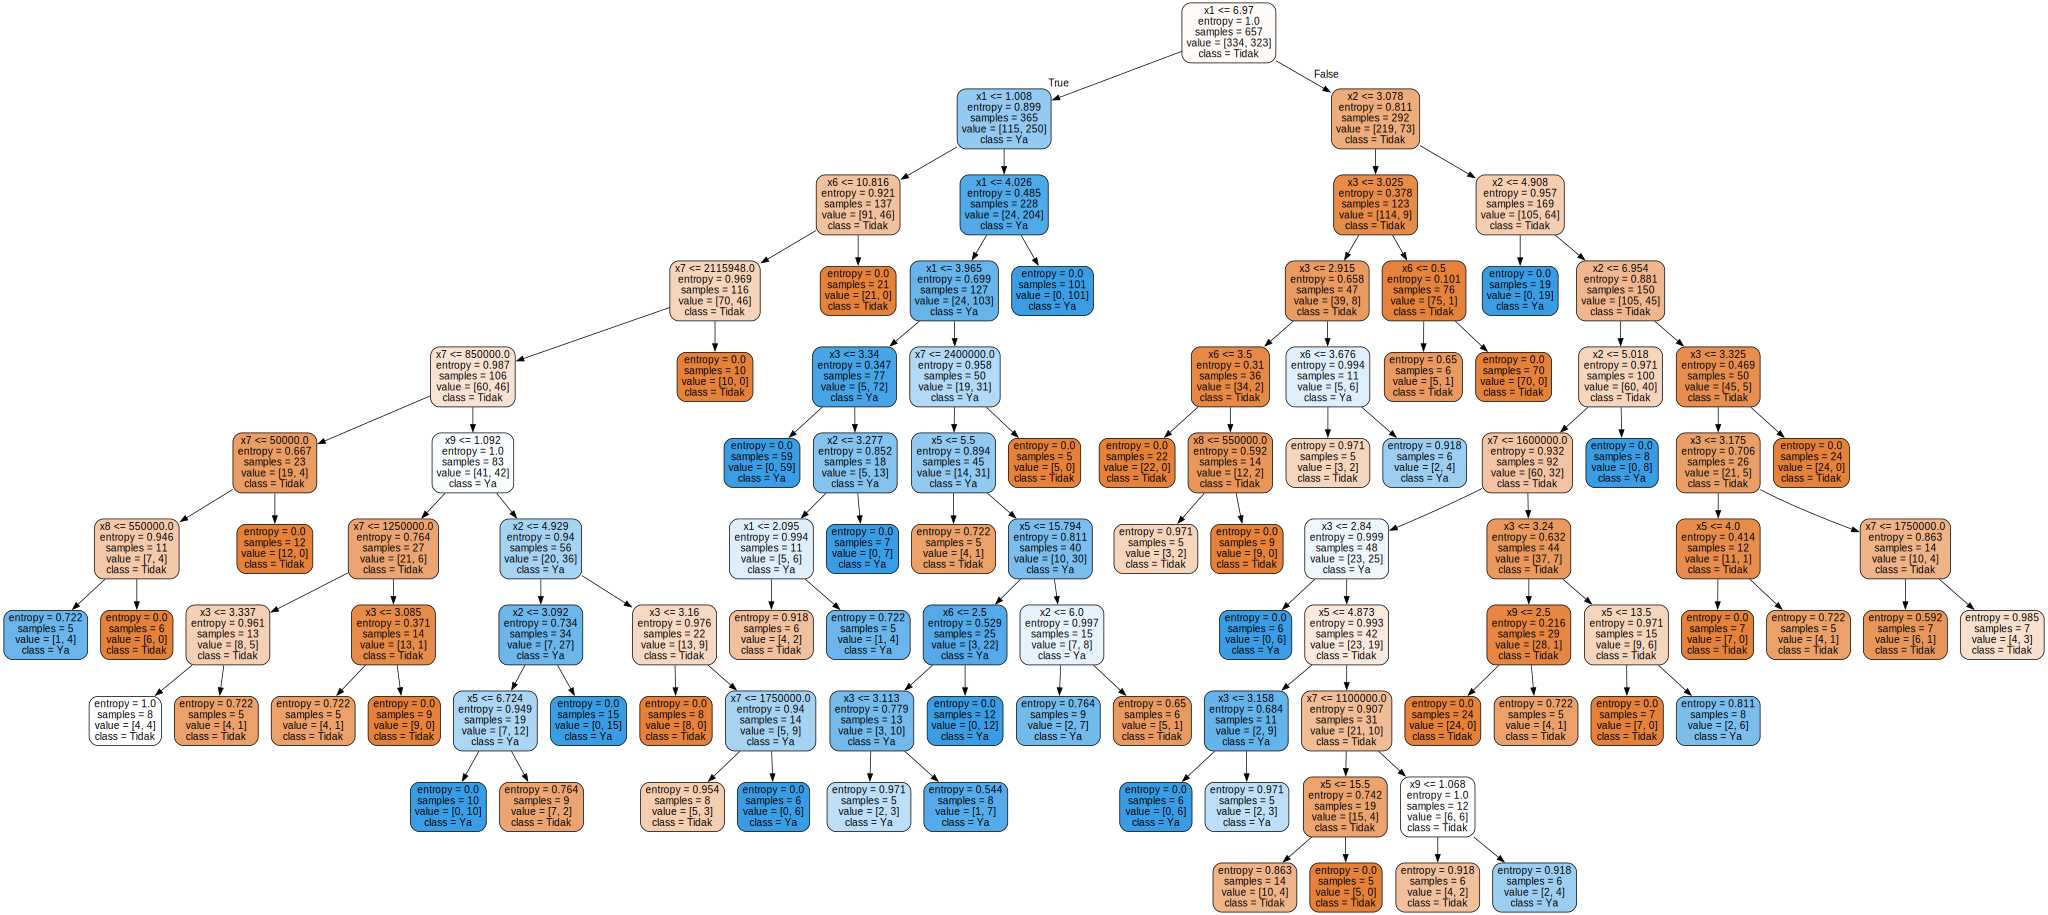

In [ ]:
# Menampilkan pohon keputusan

from sklearn.tree import export_graphviz, plot_tree
import graphviz

feature_names = X.columns
dot_data = export_graphviz(model_data_asli_82.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=feature_names, class_names=['Tidak','Ya'])

graph = graphviz.Source(dot_data, format="png")  
graph

In [ ]:
graph.render("tree2", view=False)

In [ ]:
# Melakukan prediksi mahasiswa calon penerima beasiswa
# Memberikan input

# Fitur    Nama Fitur                                 Value
# x2       Semester                                   3, 5, 7
# x3       IPK                                        Range 0-4.00
# x7       Penghasilan Kotor Ayah/perbulan            Integer
# x8       Penghasilan Kotor Ibu/perbulan             Integer
# x9       Jumlah Anggota Keluarga Yang ditanggung    Integer
# x1       Program Studi                              D3 Kebidanan = 0,          D3 Keperawatan = 1,
#                                                     S1 Akuntansi = 2,          S1 Ekonomi Syariah = 3,  
#                                                     S1 Farmasi = 4,            S1 Hukum = 5,                  
#                                                     S1 Ilmu Komputer = 6,      S1 Keperawatan = 7,        
#                                                     S1 Pgsd = 8,               S1 Sistem Informasi = 9,   
#                                                     S1 Teknik Industri = 10
# x5       Pekerjaan Ayah                             Buruh Harian Lepas = 0,    Guru = 1,
#                                                     Karyawan Swasta = 2,       Nelayan = 3,
#                                                     PNS = 4,                   Pedagang = 5,
#                                                     Pensiunan = 6,             Perangkat Desa = 7,
#                                                     Petani = 8,                Polri = 9,
#                                                     Satpam = 10,               Sopir = 11,
#                                                     TNI-AD = 12,               Tenaga Honorer = 13,
#                                                     Tidak Bekerja = 14,        Wafat = 15,
#                                                     Wiraswasta = 16
# x6       Pekerjaan Ibu                              Buruh = 0,                 Guru = 1,
#                                                     Ibu Rumah Tangga = 2,      Karyawan Swasta = 3,
#                                                     PNS = 4,                   Pedagang = 5,
#                                                     Pensiunan = 6,             Perangkat Desa = 7,  
#                                                     Perawat = 8,               Petani = 9,                                               
#                                                     TKW = 10,                  Tidak Bekerja = 11,
#                                                     Wafat = 12,                Wiraswasta = 13,
#                                                       

x2 = 5 # Semester
x3 = 3.59 # IPK
x7 = 1000000 # Penghasilan Kotor Ayah/perbulan
x8 = 0 # Penghasilan Kotor Ibu/perbulan
x9 = 2 # Jumlah Anggota Keluarga Yang ditanggung
x1 = 0 # Program Studi
x5 = 16 # Pekerjaan Ayah
x6 = 2 # Pekerjaan Ibu
testing = [[x2, x3, x7, x8, x9, x1, x5, x6]]

In [ ]:
# Melakukan prediksi berdasarkan data input
pred_test = model_data_asli_82.predict(testing)

# 0 = T
# 1 = Y

if pred_test == 0:
    hasil = "T"
elif pred_test == 1:
    hasil = "Y"
print("Hasil prediksi mahasiswa calon penerima beasiswa:", hasil)

Hasil prediksi mahasiswa calon penerima beasiswa: T


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
